# Support Vector Machine

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

In [6]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,sepal length (cm),float64,35,0
1,sepal width (cm),float64,23,0
2,petal length (cm),float64,43,0
3,petal width (cm),float64,22,0


In [8]:
# Label encode the target and add it to the DataFrame
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(iris.target)

In [9]:
# Define X and y
X = df.drop(columns=['species_encoded'])
y = df['species_encoded']

In [10]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Cross Validation

In [12]:
# Set up the parameters for the SVM
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

In [13]:
# Initialize KFold with the number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)  

In [14]:
# Dictionary to store the average accuracy for each (C, kernel) combination
results = {}

# Loop over each combination of C and kernel
for C in C_values:
    for kernel in kernels:
        accuracies = []
        
        # Perform K-Fold Cross Validation
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            # Train SVM model with current C and kernel
            model = SVC(C=C, kernel=kernel)
            model.fit(X_train, y_train)
            
            # Evaluate the model and store the accuracy
            accuracy = model.score(X_test, y_test)
            accuracies.append(accuracy)
        
        # Calculate the mean accuracy for this (C, kernel) combination
        mean_accuracy = np.mean(accuracies)
        
        # Store the mean accuracy in the results dictionary
        results[(C, kernel)] = mean_accuracy
        print(f"Average Accuracy for C={C}, kernel='{kernel}': {mean_accuracy:.4f}")

# Display the results sorted by highest accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Results (Highest Accuracy First):")
for (C, kernel), accuracy in sorted_results:
    print(f"C={C}, kernel='{kernel}': Average Accuracy = {accuracy:.4f}")


Average Accuracy for C=0.1, kernel='linear': 0.9733
Average Accuracy for C=0.1, kernel='rbf': 0.9400
Average Accuracy for C=0.1, kernel='poly': 0.9800
Average Accuracy for C=0.1, kernel='sigmoid': 0.2600
Average Accuracy for C=1, kernel='linear': 0.9733
Average Accuracy for C=1, kernel='rbf': 0.9667
Average Accuracy for C=1, kernel='poly': 0.9733
Average Accuracy for C=1, kernel='sigmoid': 0.2600
Average Accuracy for C=10, kernel='linear': 0.9600
Average Accuracy for C=10, kernel='rbf': 0.9667
Average Accuracy for C=10, kernel='poly': 0.9600
Average Accuracy for C=10, kernel='sigmoid': 0.1533
Average Accuracy for C=100, kernel='linear': 0.9667
Average Accuracy for C=100, kernel='rbf': 0.9600
Average Accuracy for C=100, kernel='poly': 0.9667
Average Accuracy for C=100, kernel='sigmoid': 0.0467

Sorted Results (Highest Accuracy First):
C=0.1, kernel='poly': Average Accuracy = 0.9800
C=0.1, kernel='linear': Average Accuracy = 0.9733
C=1, kernel='linear': Average Accuracy = 0.9733
C=1, ker

### Best SVM

In [15]:
model = SVC(C=0.1, kernel='poly')
model.fit(X_train, y_train)

SVC(C=0.1, kernel='poly')

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy = model.score(X_test, y_test)
accuracy

0.9666666666666667

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



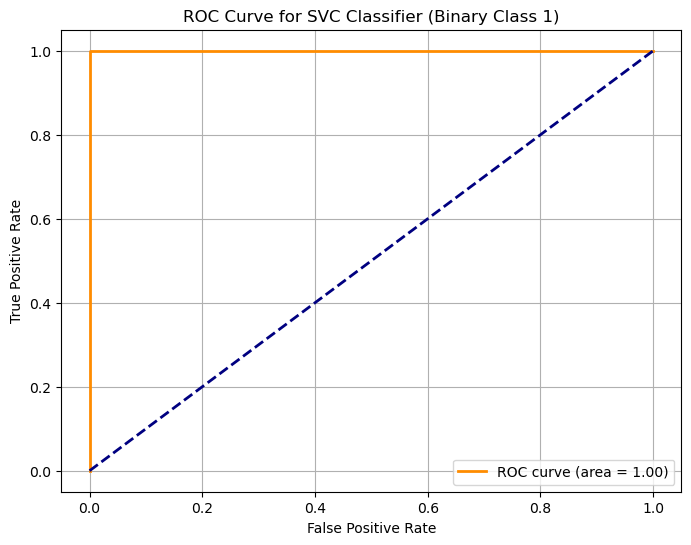

In [19]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Encode the target
df['species_encoded'] = iris.target

# Define X and y
X = df.drop(columns=['species_encoded'])
y = df['species_encoded']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Set up and train the final model with the best hyperparameters
model = SVC(C=0.1, kernel='poly', probability=True)
model.fit(X_train, y_train)

# Generate probabilities and calculate the ROC curve for the chosen class (e.g., 'versicolor' = 1)
y_test_bin = (y_test == 1).astype(int)  # Convert to binary for class 1
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVC Classifier (Binary Class 1)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

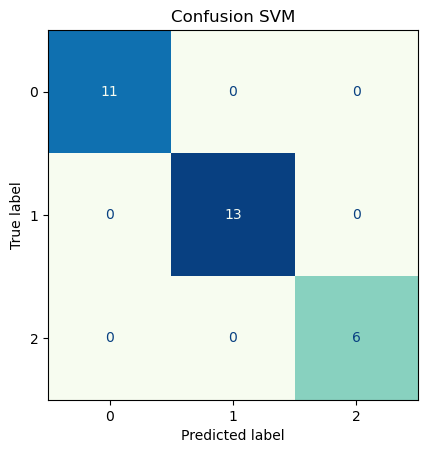

In [20]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion SVM')
plt.grid(False)

## Worst SVM

In [21]:
model2 = SVC(C=100, kernel='sigmoid')
model2.fit(X_train, y_train)

SVC(C=100, kernel='sigmoid')

In [22]:
y_pred = model2.predict(X_test)

In [23]:
accuracy = model2.score(X_test, y_test)
accuracy

0.06666666666666667

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        13
           2       0.11      0.33      0.16         6

    accuracy                           0.07        30
   macro avg       0.04      0.11      0.05        30
weighted avg       0.02      0.07      0.03        30



C:\Users\novin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\novin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\novin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


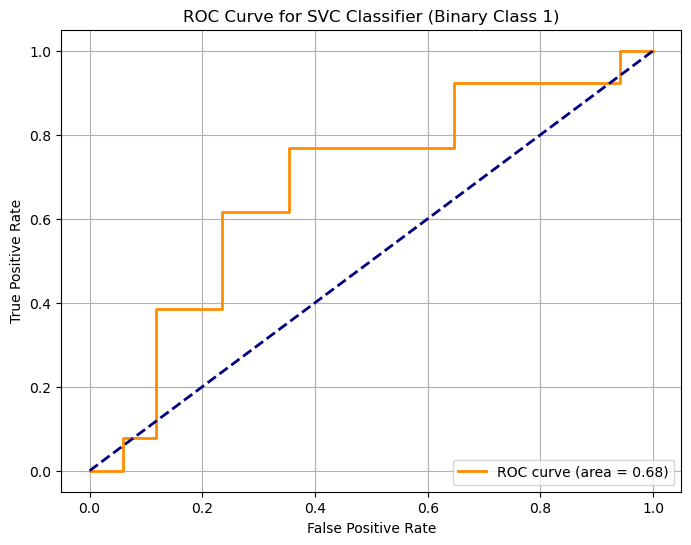

In [28]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Encode the target
df['species_encoded'] = iris.target

# Define X and y
X = df.drop(columns=['species_encoded'])
y = df['species_encoded']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Set up and train the final model with the best hyperparameters
model2 = SVC(C=100, kernel='sigmoid', probability=True)
model2.fit(X_train, y_train)

# Generate probabilities and calculate the ROC curve for the chosen class (e.g., 'versicolor' = 1)
y_test_bin = (y_test == 1).astype(int)  # Convert to binary for class 1
y_proba = model2.predict_proba(X_test)[:, 1]  # Probability for class 1

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVC Classifier (Binary Class 1)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

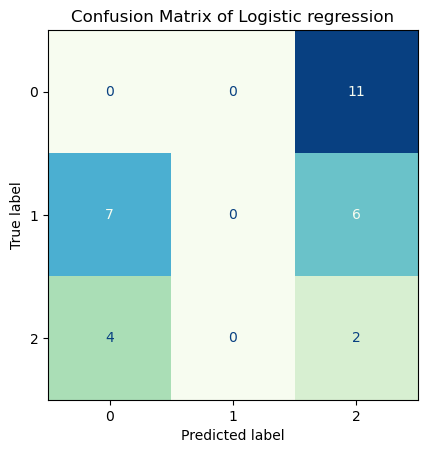

In [29]:
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, colorbar=False, cmap='GnBu')
plt.title('Confusion Matrix of Logistic regression')
plt.grid(False)